### Load libraries

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import set_config
set_config(display="diagram")
np.random.seed(42)

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.inspection import permutation_importance

print(sys.version) # version of Python
print(sklearn.__version__) # version of sklearn module

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
1.1.2


### 1. Data exploration

In [2]:
data_path = 'game_data.csv'
encoding = 'utf-8'
data = pd.read_csv(data_path, delimiter=',', encoding=encoding)
data.head()

,FavouriteRole,LeastFavoriteRole,RoleMostPlay,RoleLeastPlay,BestRole,WorstRole,FavoritePosition,LeastFavoritePosition,BestPosition,WorstPosition,...,ganrao,yunxuan,jinghua,ruohua,shanxian,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness
0,2,3,2,1,2,4,5,1,5,1,...,0.0,0.0,0.0,0.0,1.0,high,high,high,high,high
1,1,5,1,5,1,5,1,4,1,4,...,0.0,0.0,0.0,0.0,1.0,high,high,low,low,low
2,5,2,5,2,5,2,4,3,4,3,...,0.0,0.0,0.0,0.0,1.0,high,low,high,high,low
3,6,2,6,1,6,1,5,2,5,1,...,0.0,0.0,0.0,0.0,0.0,high,low,low,high,low
4,1,5,1,6,1,5,5,1,4,1,...,0.0,0.0,0.0,0.0,1.0,high,low,low,low,low


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FavouriteRole          1058 non-null   int64  
 1   LeastFavoriteRole      1058 non-null   int64  
 2   RoleMostPlay           1058 non-null   int64  
 3   RoleLeastPlay          1058 non-null   int64  
 4   BestRole               1058 non-null   int64  
 5   WorstRole              1058 non-null   int64  
 6   FavoritePosition       1058 non-null   int64  
 7   LeastFavoritePosition  1058 non-null   int64  
 8   BestPosition           1058 non-null   int64  
 9   WorstPosition          1058 non-null   int64  
 10  PositionMostPlay       1058 non-null   int64  
 11  PositionLeastPlay      1058 non-null   int64  
 12  chengjie               1058 non-null   float64
 13  zhongjie               1058 non-null   float64
 14  kuangbao               1058 non-null   float64
 15  jipa

In [4]:
data.FavouriteRole.value_counts()

1    298
6    251
2    159
4    155
5    137
3     58
Name: FavouriteRole, dtype: int64

In [5]:
data.FavoritePosition.value_counts()

2    321
1    216
3    202
4    188
5    131
Name: FavoritePosition, dtype: int64

In [6]:
# calculate the class distribution percentage 
print(data['Neuroticism'].value_counts(normalize=True))

high    0.50189
low     0.49811
Name: Neuroticism, dtype: float64


In [7]:
# calculate the class distribution percentage 
print(data['Extraversion'].value_counts(normalize=True))

high    0.500945
low     0.499055
Name: Extraversion, dtype: float64


In [8]:
# calculate the class distribution percentage 
print(data['Openness'].value_counts(normalize=True))

high    0.545369
low     0.454631
Name: Openness, dtype: float64


In [9]:
# calculate the class distribution percentage 
print(data['Agreeableness'].value_counts(normalize=True))

high    0.551985
low     0.448015
Name: Agreeableness, dtype: float64


In [10]:
# calculate the class distribution percentage 
print(data['Conscientiousness'].value_counts(normalize=True))

high    0.504726
low     0.495274
Name: Conscientiousness, dtype: float64


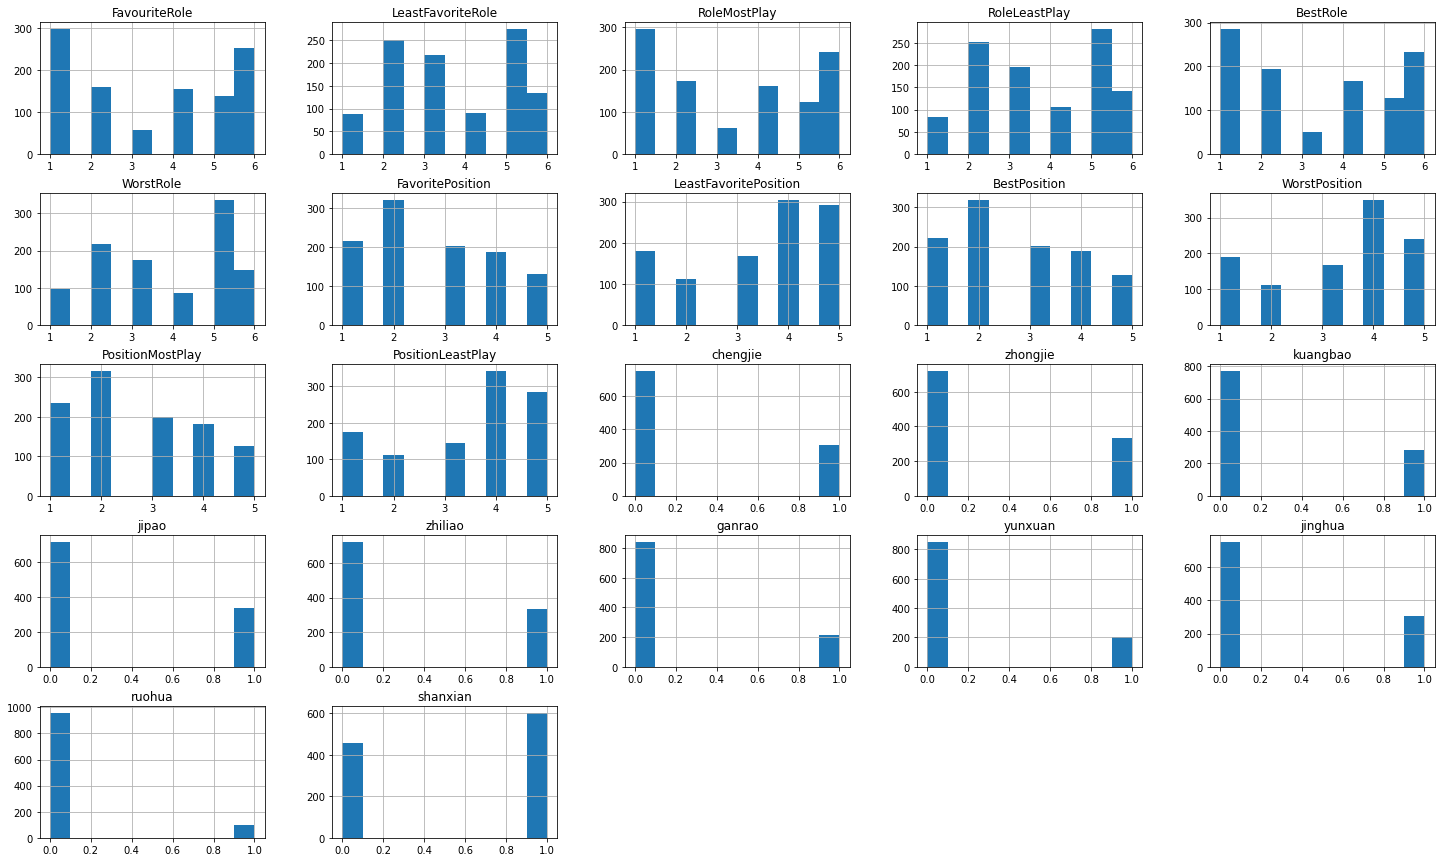

In [11]:
pd.plotting.hist_frame(data, figsize=(25,15));

### 2. Experiments

### 2.1 Neuroticism

#### 2.1.1 Split data 

In [12]:
X = data[['FavouriteRole', 'LeastFavoriteRole', 'RoleMostPlay', 'RoleLeastPlay', 'BestRole','WorstRole',
          'FavoritePosition', 'LeastFavoritePosition', 'BestPosition','WorstPosition','PositionMostPlay','PositionLeastPlay', 
          'chengjie', 'zhongjie', 'kuangbao', 'jipao', 'zhiliao', 'ganrao', 'yunxuan', 'jinghua', 'ruohua', 'shanxian']]
y = data['Neuroticism']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42, shuffle=True,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((793, 22), (265, 22), (793,), (265,))

#### 2.1.2 Baseline model

In [9]:
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)
accuracy = dummy.score(X_train, y_train)
print(accuracy)

y_pred = dummy.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f1)

0.501891551071879
0.33417085427135673


#### 2.1.3 Model performance comparison (evaluation metric: macro F1 score)

#### 1) Logistic Regression 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [15]:
# OneHotEncoder to make sure the multicategorical data are nominal data instead of ordinal data

lr = make_pipeline(OneHotEncoder(),
                   LogisticRegression(class_weight='balanced', random_state=42))

lr_param_grid={'logisticregression__C': [0.01, 0.1, 1.0, 10, 100],
               'logisticregression__solver': ['newton-cg', 'sag', 'saga','lbfgs']}

lr_gs = GridSearchCV(lr, lr_param_grid, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
lr_gs.fit(X_train, y_train)

print(f"best score: {lr_gs.best_score_}")
print(f"best params: {lr_gs.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
best score: 0.6586767966283051
best params: {'logisticregression__C': 0.01, 'logisticregression__solver': 'sag'}


#### 10-fold cv to make sure the model is not overfitting

In [23]:
best_lr = lr_gs.best_estimator_

cv_scores_lr = cross_val_score(best_lr, X_train, y_train, cv=10, scoring='f1_macro')
print(cv_scores_lr)
print(cv_scores_lr.mean())
print(cv_scores_lr.std())             

[0.67479675 0.61195431 0.67171717 0.63078163 0.72111682 0.58227848
 0.61872587 0.74679487 0.6835443  0.64505777]
0.6586767966283051
0.048260995389731054


#### hold-out method to evaluate the classification performance

In [24]:
best_lr.fit(X_train, y_train)
lr_pred = best_lr.predict(X_test)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

        high       0.65      0.69      0.67       133
         low       0.67      0.63      0.65       132

    accuracy                           0.66       265
   macro avg       0.66      0.66      0.66       265
weighted avg       0.66      0.66      0.66       265



#### 2) Decision Tree 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [95]:
dt = make_pipeline(OneHotEncoder(),
                   DecisionTreeClassifier(class_weight='balanced', random_state=42))

dt_param_grid={'decisiontreeclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'decisiontreeclassifier__max_depth': [20, 30, 40, 50, 60, 70, 80, 90, 100]}

dt_gs = GridSearchCV(dt, dt_param_grid, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
dt_gs.fit(X_train, y_train)

print(f"best score: {dt_gs.best_score_}")
print(f"best params: {dt_gs.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
best score: 0.5996798148741224
best params: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 20}


#### 10-fold cv to make sure the model is not overfitting

In [96]:
best_dt = dt_gs.best_estimator_

cv_scores_dt = cross_val_score(best_dt, X_train, y_train, cv=10, scoring='f1_macro')
print(cv_scores_dt)
print(cv_scores_dt.mean())
print(cv_scores_dt.std())     

[0.575      0.57473421 0.66117647 0.58201058 0.61970475 0.58227848
 0.51891026 0.67083333 0.6817083  0.53044177]
0.5996798148741224
0.053979946062069885


#### hold-out method to evaluate the classification performance

In [97]:
best_dt.fit(X_train, y_train)
dt_pred = best_dt.predict(X_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

        high       0.65      0.70      0.67       133
         low       0.67      0.62      0.65       132

    accuracy                           0.66       265
   macro avg       0.66      0.66      0.66       265
weighted avg       0.66      0.66      0.66       265



#### 3) Random Forest 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [13]:
rf = make_pipeline(OneHotEncoder(),
                   RandomForestClassifier(class_weight='balanced', random_state=42))

rf_param_grid={'randomforestclassifier__n_estimators': [150, 300, 500],
               'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'randomforestclassifier__max_depth': [30, 40, 50]}

rf_gs = GridSearchCV(rf, rf_param_grid, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
rf_gs.fit(X_train, y_train)

print(f"best score: {rf_gs.best_score_}")
print(f"best params: {rf_gs.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
best score: 0.6779781570275891
best params: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 30, 'randomforestclassifier__n_estimators': 150}


#### 10-fold cv to make sure the model is not overfitting

In [14]:
best_rf = rf_gs.best_estimator_

cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=10, scoring='f1_macro')
print(cv_scores_rf)
print(cv_scores_rf.mean())
print(cv_scores_rf.std())     

[0.71028185 0.63744335 0.64912281 0.73417722 0.65800866 0.61970475
 0.64505777 0.69615385 0.81012658 0.61970475]
0.6779781570275891
0.057223456006918305


#### hold-out method to evaluate the classification model

In [39]:
best_rf.fit(X_train, y_train)
rf_pred = best_rf.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

        high       0.74      0.77      0.75       133
         low       0.76      0.73      0.74       132

    accuracy                           0.75       265
   macro avg       0.75      0.75      0.75       265
weighted avg       0.75      0.75      0.75       265



#### Feature importance

In [37]:
print(best_rf)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=30,
                                        n_estimators=150, random_state=42))])


In [30]:
# Get the feature importance from the RandomForestClassifier object
classifier = best_rf.steps[1][1]
feature_importance = classifier.feature_importances_

# Sort the feature importance in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Get the original feature names and the corresponding one-hot encoded indices
encoder = best_rf.steps[0][1]
encoded_feature_names = encoder.get_feature_names(input_features=X.columns)

# Print the feature importance of the encoded features
for idx in sorted_idx:
    print(f"Feature: {encoded_feature_names[idx]}, "
          f"Importance: {feature_importance[idx]}")

Feature: jinghua_0.0, Importance: 0.025078873640772856
Feature: jinghua_1.0, Importance: 0.024306390073965047
Feature: zhiliao_0.0, Importance: 0.02046640596624988
Feature: shanxian_0.0, Importance: 0.01958996099798583
Feature: zhiliao_1.0, Importance: 0.019122027737437507
Feature: shanxian_1.0, Importance: 0.018660190237283093
Feature: jipao_1.0, Importance: 0.018059653513364284
Feature: PositionLeastPlay_5, Importance: 0.01803829082249633
Feature: jipao_0.0, Importance: 0.016972490559029454
Feature: zhongjie_1.0, Importance: 0.01692893334100542
Feature: ganrao_0.0, Importance: 0.016732256743207233
Feature: kuangbao_0.0, Importance: 0.016469168636820124
Feature: yunxuan_0.0, Importance: 0.016435668292505343
Feature: zhongjie_0.0, Importance: 0.01642872759940945
Feature: yunxuan_1.0, Importance: 0.016026125875047002
Feature: LeastFavoritePosition_5, Importance: 0.015889316271694202
Feature: chengjie_1.0, Importance: 0.01558097301870223
Feature: chengjie_0.0, Importance: 0.0151243922016

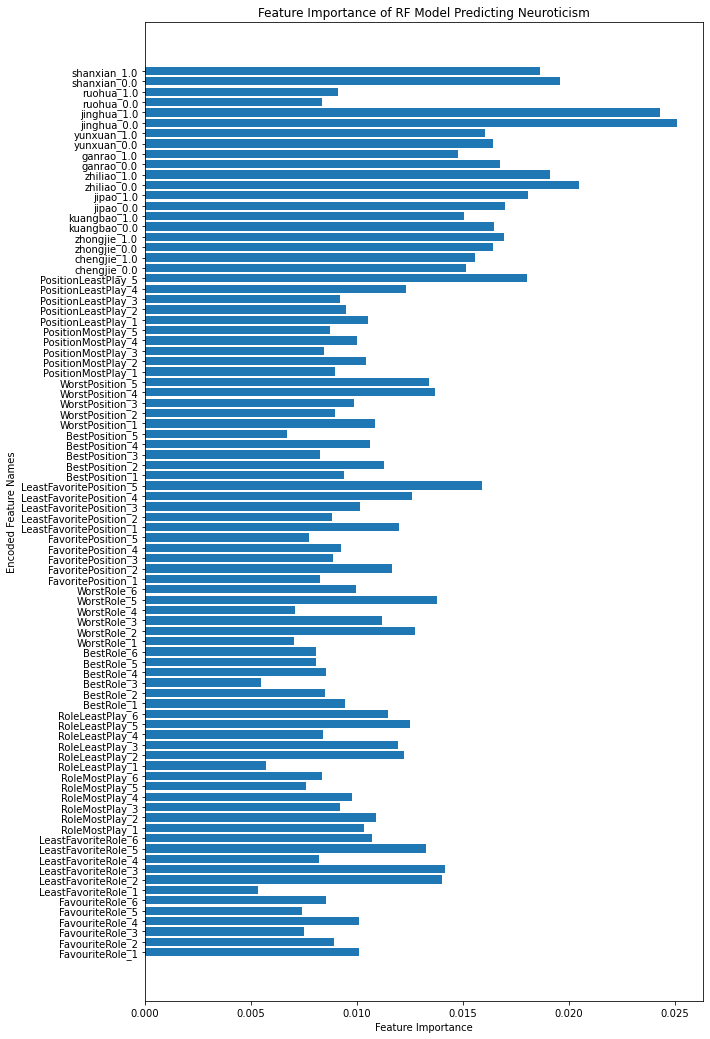

In [33]:
# Plot the feature importance of the encoded features in a bar plot
plt.figure(figsize=(10,18))
plt.barh(encoded_feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Encoded Feature Names')
plt.title('Feature Importance of RF Model Predicting Neuroticism');

#### 4) KNN 
#### 10-fold gridsearch cv to fine tune hyperparameters

In [101]:
knn = make_pipeline(OneHotEncoder(),
                    KNeighborsClassifier())

knn_param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
                'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_gs = GridSearchCV(knn, knn_param_grid, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
knn_gs.fit(X_train, y_train)

print(f"best score: {knn_gs.best_score_}")
print(f"best params: {knn_gs.best_params_}")

Fitting 10 folds for each of 44 candidates, totalling 440 fits
best score: 0.6440709263929559
best params: {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 8}


#### 10-fold cv to make sure the model is not overfitting

In [102]:
best_knn = knn_gs.best_estimator_

cv_scores_knn = cross_val_score(best_knn, X_train, y_train, cv=10, scoring='f1_macro')
print(cv_scores_knn)
print(cv_scores_knn.mean())
print(cv_scores_knn.std()) 

[0.66244726 0.60753284 0.72482802 0.63267597 0.67041078 0.64505777
 0.51518088 0.67083333 0.67083333 0.64090909]
0.6440709263929559
0.05203280768796885


#### hold-out method to evaluate the classification model

In [103]:
best_knn.fit(X_train, y_train)
knn_pred = best_knn.predict(X_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

        high       0.65      0.77      0.71       133
         low       0.72      0.59      0.65       132

    accuracy                           0.68       265
   macro avg       0.68      0.68      0.68       265
weighted avg       0.68      0.68      0.68       265



#### 5) SVM 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [104]:
svm = make_pipeline(OneHotEncoder(),
                    SVC(class_weight='balanced', random_state=42))

svm_param_grid={'svc__kernel': ['linear', 'rbf', 'poly','sigmoid'],
                'svc__C': [0.01, 0.1, 1.0, 10, 100]}

svm_gs = GridSearchCV(svm, svm_param_grid, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
svm_gs.fit(X_train, y_train)

print(f"best score: {svm_gs.best_score_}")
print(f"best params: {svm_gs.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
best score: 0.6738974956399268
best params: {'svc__C': 0.1, 'svc__kernel': 'poly'}


#### 10-fold cv to make sure the model is not overfitting

In [105]:
best_svm = svm_gs.best_estimator_

cv_scores_svm = cross_val_score(best_svm, X_train, y_train, cv=10, scoring='f1_macro')
print(cv_scores_svm)
print(cv_scores_svm.mean())
print(cv_scores_svm.std()) 

[0.6969697  0.64978111 0.66244726 0.70886076 0.72111682 0.56788932
 0.60759494 0.72147436 0.74483204 0.65800866]
0.6738974956399268
0.05280020297200141


#### hold-out method to evaluate the classification model

In [106]:
best_svm.fit(X_train, y_train)
svm_pred = best_svm.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

        high       0.73      0.72      0.72       133
         low       0.72      0.73      0.72       132

    accuracy                           0.72       265
   macro avg       0.72      0.72      0.72       265
weighted avg       0.72      0.72      0.72       265



### 2.2 Extraversion

#### 2.2.1 Split data

In [52]:
X2 = data[['FavouriteRole', 'LeastFavoriteRole', 'RoleMostPlay', 'RoleLeastPlay', 'BestRole','WorstRole',
  'FavoritePosition', 'LeastFavoritePosition', 'BestPosition','WorstPosition','PositionMostPlay','PositionLeastPlay', 
 'chengjie', 'zhongjie', 'kuangbao', 'jipao', 'zhiliao', 'ganrao', 'yunxuan', 'jinghua', 'ruohua', 'shanxian']]
y2 = data['Extraversion']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, stratify=y2, random_state=42, shuffle=True,)
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((793, 22), (265, 22), (793,), (265,))

#### 2.2.2 Baseline model

#### most_frequent

In [14]:
dummy2 = DummyClassifier(strategy="most_frequent", random_state=42)
dummy2.fit(X_train2, y_train2)
accuracy2 = dummy2.score(X_train2, y_train2)
print(accuracy2)

y_pred2 = dummy2.predict(X_test2)
f1_2 = f1_score(y_test2, y_pred2, average='macro')
print(f1_2)

0.5006305170239597
0.33417085427135673


#### 2.2.3 Model performance comparison (evaluation metric: macro F1 score)

#### 1) LogisticRegression 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [111]:
lr2 = make_pipeline(OneHotEncoder(),
                    LogisticRegression(class_weight='balanced', random_state=42))

lr_param_grid2={'logisticregression__C': [0.01, 0.1, 1.0, 10, 100],
               'logisticregression__solver': ['newton-cg', 'sag', 'saga','lbfgs']}

lr_gs2 = GridSearchCV(lr2, lr_param_grid2, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
lr_gs2.fit(X_train2, y_train2)

print(f"best score: {lr_gs2.best_score_}")
print(f"best params: {lr_gs2.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
best score: 0.65053965680051
best params: {'logisticregression__C': 0.01, 'logisticregression__solver': 'sag'}


#### 10-fold cv to make sure the model is not overfitting

In [112]:
best_lr2 = lr_gs.best_estimator_

cv_scores_lr2 = cross_val_score(best_lr2, X_train2, y_train2, cv=10, scoring='f1_macro')
print(cv_scores_lr2)
print(cv_scores_lr2.mean())
print(cv_scores_lr2.std()) 

[0.66202472 0.63744335 0.53742772 0.59435173 0.77211538 0.63196787
 0.67083333 0.64505777 0.68334135 0.67083333]
0.65053965680051
0.05771485936601648


#### hold-out method to evaluate the classification model

In [113]:
best_lr2.fit(X_train2, y_train2)
lr2_pred = best_lr2.predict(X_test2)
print(classification_report(y_test2, lr2_pred))

              precision    recall  f1-score   support

        high       0.66      0.61      0.63       133
         low       0.63      0.68      0.66       132

    accuracy                           0.65       265
   macro avg       0.65      0.65      0.64       265
weighted avg       0.65      0.65      0.64       265



#### 2) DecisionTree 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [114]:
dt2 = make_pipeline(OneHotEncoder(),
                    DecisionTreeClassifier(class_weight='balanced', random_state=42))

dt_param_grid2={'decisiontreeclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'decisiontreeclassifier__max_depth': [20, 30, 40, 50, 60, 70, 80, 90, 100]}

dt_gs2 = GridSearchCV(dt2, dt_param_grid2, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
dt_gs2.fit(X_train2, y_train2)

print(f"best score: {dt_gs2.best_score_}")
print(f"best params: {dt_gs2.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
best score: 0.6259242670119363
best params: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 20}


#### 10-fold cv to make sure the model is not overfitting

In [115]:
best_dt2 = dt_gs.best_estimator_

cv_scores_dt2 = cross_val_score(best_dt2, X_train2, y_train2, cv=10, scoring='f1_macro')
print(cv_scores_dt2)
print(cv_scores_dt2.mean())
print(cv_scores_dt2.std()) 

[0.55912455 0.71137255 0.51181349 0.63291139 0.7588755  0.6127451
 0.63196787 0.5497476  0.58201058 0.70867404]
0.6259242670119363
0.07569595084018643


#### hold-out method to evaluate the classification model

In [116]:
best_dt2.fit(X_train2, y_train2)
dt2_pred = best_dt2.predict(X_test2)
print(classification_report(y_test2, dt2_pred))

              precision    recall  f1-score   support

        high       0.58      0.63      0.60       133
         low       0.59      0.54      0.56       132

    accuracy                           0.58       265
   macro avg       0.59      0.58      0.58       265
weighted avg       0.59      0.58      0.58       265



#### 3) RandomForest 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [117]:
rf2 = make_pipeline(OneHotEncoder(),
                    RandomForestClassifier(class_weight='balanced', random_state=42))

rf_param_grid2={'randomforestclassifier__n_estimators': [150, 300, 500],
               'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'randomforestclassifier__max_depth': [30, 40, 50]}

rf_gs2 = GridSearchCV(rf2, rf_param_grid2, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
rf_gs2.fit(X_train2, y_train2)

print(f"best score: {rf_gs2.best_score_}")
print(f"best params: {rf_gs2.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
best score: 0.6489317880728768
best params: {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 30, 'randomforestclassifier__n_estimators': 150}


#### 10-fold cv to make sure the model is not overfitting

In [118]:
best_rf2 = rf_gs.best_estimator_ 

cv_scores_rf2 = cross_val_score(best_rf2, X_train2, y_train2, cv=10, scoring='f1_macro')
print(cv_scores_rf2)
print(cv_scores_rf2.mean())
print(cv_scores_rf2.std()) 

[0.68745116 0.61195431 0.57473421 0.61872587 0.70867404 0.6817083
 0.60734327 0.58201058 0.73417722 0.58227848]
0.6389057446589013
0.055519793009980105


#### hold-out method to evaluate the classification model

In [119]:
best_rf2.fit(X_train2, y_train2)
rf2_pred = best_rf2.predict(X_test2)
print(classification_report(y_test2, rf2_pred))

              precision    recall  f1-score   support

        high       0.64      0.62      0.63       133
         low       0.63      0.65      0.64       132

    accuracy                           0.63       265
   macro avg       0.63      0.63      0.63       265
weighted avg       0.63      0.63      0.63       265



#### 4) KNN 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [120]:
knn2 = make_pipeline(OneHotEncoder(),
                     KNeighborsClassifier())

knn_param_grid2={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
                'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_gs2 = GridSearchCV(knn2, knn_param_grid2, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
knn_gs2.fit(X_train2, y_train2)

print(f"best score: {knn_gs2.best_score_}")
print(f"best params: {knn_gs2.best_params_}")

Fitting 10 folds for each of 44 candidates, totalling 440 fits
best score: 0.650188539930422
best params: {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 9}


#### 10-fold cv to make sure the model is not overfitting

In [121]:
best_knn2 = knn_gs.best_estimator_

cv_scores_knn2 = cross_val_score(best_knn2, X_train2, y_train2, cv=10, scoring='f1_macro')
print(cv_scores_knn2)
print(cv_scores_knn2.mean())
print(cv_scores_knn2.std()) 

[0.67316153 0.61098039 0.55689191 0.56873449 0.66828165 0.72039897
 0.60968379 0.57795046 0.69615385 0.64414414]
0.6326381200675225
0.05346874910211918


#### hold-out method to evaluate the classification model

In [122]:
best_knn2.fit(X_train2, y_train2)
knn2_pred = best_knn2.predict(X_test2)
print(classification_report(y_test2, knn2_pred))

              precision    recall  f1-score   support

        high       0.58      0.71      0.64       133
         low       0.62      0.49      0.55       132

    accuracy                           0.60       265
   macro avg       0.60      0.60      0.60       265
weighted avg       0.60      0.60      0.60       265



#### 2) SVM 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [45]:
svm2 = make_pipeline(OneHotEncoder(),
                     SVC(class_weight='balanced', random_state=42))

svm_param_grid2={'svc__kernel': ['linear', 'rbf', 'poly','sigmoid'],
                'svc__C': [0.01, 0.1, 1.0, 10, 100]}

svm_gs2 = GridSearchCV(svm2, svm_param_grid2, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
svm_gs2.fit(X_train2, y_train2)

print(f"best score: {svm_gs2.best_score_}")
print(f"best params: {svm_gs2.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
best score: 0.6564174979815534
best params: {'svc__C': 1.0, 'svc__kernel': 'rbf'}


#### 10-fold CV to make sure the model is not overfitting

In [47]:
best_svm2 = svm_gs2.best_estimator_

cv_scores_svm2 = cross_val_score(best_svm2, X_train2, y_train2, cv=10, scoring='f1_macro')
print(cv_scores_svm2)
print(cv_scores_svm2.mean())
print(cv_scores_svm2.std()) 

[0.63744335 0.66117647 0.56243163 0.55667789 0.7974359  0.70717164
 0.64551282 0.63196787 0.70811245 0.65624496]
0.6564174979815534
0.06709341577775756


#### hold-out method to evaluate the classification model

In [48]:
best_svm2.fit(X_train2, y_train2)
svm2_pred = best_svm2.predict(X_test2)
print(classification_report(y_test2, svm2_pred))

              precision    recall  f1-score   support

        high       0.68      0.60      0.64       133
         low       0.64      0.72      0.68       132

    accuracy                           0.66       265
   macro avg       0.66      0.66      0.66       265
weighted avg       0.66      0.66      0.66       265



### 2.3 Openness

#### 2.3.1 Split data

In [126]:
X3 = data[['FavouriteRole', 'LeastFavoriteRole', 'RoleMostPlay', 'RoleLeastPlay', 'BestRole','WorstRole',
  'FavoritePosition', 'LeastFavoritePosition', 'BestPosition','WorstPosition','PositionMostPlay','PositionLeastPlay', 
 'chengjie', 'zhongjie', 'kuangbao', 'jipao', 'zhiliao', 'ganrao', 'yunxuan', 'jinghua', 'ruohua', 'shanxian']]

y3 = data['Openness']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, stratify=y3, random_state=42, shuffle=True,)
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

((793, 22), (265, 22), (793,), (265,))

#### 2.3.2 Baseline model

In [127]:
dummy3 = DummyClassifier(strategy="most_frequent", random_state=42)
dummy3.fit(X_train3, y_train3)
accuracy3 = dummy3.score(X_train3, y_train3)
print(accuracy3)

y_pred3 = dummy3.predict(X_test3)
f1_3 = f1_score(y_test3, y_pred3, average='macro')
print(f1_3)

0.544766708701135
0.35365853658536583


#### 2.3.3 Model performance comparison (evaluation metric: macro F1 score)

#### 1) LogisticRegression 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [128]:
lr3 = make_pipeline(OneHotEncoder(),
                    LogisticRegression(class_weight='balanced', random_state=42))

lr_param_grid3={'logisticregression__C': [0.01, 0.1, 1.0, 10, 100],
               'logisticregression__solver': ['newton-cg', 'sag', 'saga','lbfgs']}

lr_gs3 = GridSearchCV(lr3, lr_param_grid3, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
lr_gs3.fit(X_train3, y_train3)

print(f"best score: {lr_gs3.best_score_}")
print(f"best params: {lr_gs3.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
best score: 0.6296204193486645
best params: {'logisticregression__C': 0.01, 'logisticregression__solver': 'sag'}


#### 10-fold cv to make sure the model is not overfitting

In [129]:
best_lr3 = lr_gs.best_estimator_

cv_scores_lr3 = cross_val_score(best_lr3, X_train3, y_train3, cv=10, scoring='f1_macro')
print(cv_scores_lr3)
print(cv_scores_lr3.mean())
print(cv_scores_lr3.std())

[0.67418546 0.72344437 0.67479675 0.56899872 0.56899872 0.59487179
 0.6835443  0.59435173 0.61970475 0.59330759]
0.6296204193486645
0.051919104843118125


#### hold-out method for final classification perfomrnace evaluation 

In [130]:
best_lr3.fit(X_train3, y_train3)
lr_pred3 = best_lr3.predict(X_test3)
print(classification_report(y_test3, lr_pred3))

              precision    recall  f1-score   support

        high       0.74      0.59      0.66       145
         low       0.60      0.74      0.66       120

    accuracy                           0.66       265
   macro avg       0.67      0.67      0.66       265
weighted avg       0.67      0.66      0.66       265



#### 2) DecisionTree 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [131]:
dt3 = make_pipeline(OneHotEncoder(),
                    DecisionTreeClassifier(class_weight='balanced', random_state=42))

dt_param_grid3={'decisiontreeclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'decisiontreeclassifier__max_depth': [20, 30, 40, 50, 60, 70, 80, 90, 100]}

dt_gs3 = GridSearchCV(dt3, dt_param_grid3, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
dt_gs3.fit(X_train3, y_train3)

print(f"best score: {dt_gs3.best_score_}")
print(f"best params: {dt_gs3.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
best score: 0.5888052130012902
best params: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 20}


#### 10-fold cv to make sure the model is not overfitting

In [132]:
best_dt3 = dt_gs.best_estimator_

cv_scores_dt3 = cross_val_score(best_dt3, X_train3, y_train3, cv=10, scoring='f1_macro')
print(cv_scores_dt3)
print(cv_scores_dt3.mean())
print(cv_scores_dt3.std())

[0.63698952 0.56157318 0.70881469 0.71785714 0.62910798 0.53529412
 0.52892828 0.52679294 0.5523717  0.49032258]
0.5888052130012902
0.0755412030278227


#### hold-out method for final classification perfomrnace evaluation 

In [133]:
best_dt3.fit(X_train3, y_train3)
dt_pred3 = best_dt3.predict(X_test3)
print(classification_report(y_test3, dt_pred3))

              precision    recall  f1-score   support

        high       0.66      0.59      0.62       145
         low       0.56      0.63      0.59       120

    accuracy                           0.61       265
   macro avg       0.61      0.61      0.61       265
weighted avg       0.61      0.61      0.61       265



#### 3) RandomForest 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [134]:
rf3 = make_pipeline(OneHotEncoder(),
                    RandomForestClassifier(class_weight='balanced', random_state=42))

rf_param_grid3={'randomforestclassifier__n_estimators': [150, 300, 500],
               'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'randomforestclassifier__max_depth': [30, 40, 50]}

rf_gs3 = GridSearchCV(rf3, rf_param_grid3, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
rf_gs3.fit(X_train3, y_train3)

print(f"best score: {rf_gs3.best_score_}")
print(f"best params: {rf_gs3.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
best score: 0.6656009061964318
best params: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 30, 'randomforestclassifier__n_estimators': 500}


#### 10-fold cv to make sure the model is not overfitting

In [135]:
best_rf3 = rf_gs.best_estimator_

cv_scores_rf3 = cross_val_score(best_rf3, X_train3, y_train3, cv=10, scoring='f1_macro')
print(cv_scores_rf3)
print(cv_scores_rf3.mean())
print(cv_scores_rf3.std())

[0.69052224 0.66881934 0.78173648 0.69640769 0.70584426 0.68774704
 0.63570487 0.55667789 0.58610782 0.52662215]
0.6536189789481268
0.0735761597957294


#### hold-out method for final classification perfomrnace evaluation 

In [136]:
best_rf3.fit(X_train3, y_train3)
rf_pred3 = best_rf3.predict(X_test3)
print(classification_report(y_test3, rf_pred3))

              precision    recall  f1-score   support

        high       0.70      0.69      0.69       145
         low       0.63      0.64      0.64       120

    accuracy                           0.67       265
   macro avg       0.67      0.67      0.67       265
weighted avg       0.67      0.67      0.67       265



#### 4) KNN 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [137]:
knn3 = make_pipeline(OneHotEncoder(),
                     KNeighborsClassifier())

knn_param_grid3={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
                'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_gs3 = GridSearchCV(knn3, knn_param_grid3, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
knn_gs3.fit(X_train3, y_train3)

print(f"best score: {knn_gs3.best_score_}")
print(f"best params: {knn_gs3.best_params_}")

Fitting 10 folds for each of 44 candidates, totalling 440 fits
best score: 0.6388238028969551
best params: {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 6}


#### 10-fold cv to make sure the model is not overfitting

In [138]:
best_knn3 = knn_gs.best_estimator_

cv_scores_knn3 = cross_val_score(best_knn3, X_train3, y_train3, cv=10, scoring='f1_macro')
print(cv_scores_knn3)
print(cv_scores_knn3.mean())
print(cv_scores_knn3.std())

[0.71033575 0.61583044 0.73333333 0.63231383 0.6471464  0.65857713
 0.58366271 0.56873449 0.60605053 0.48521303]
0.6241197645378908
0.06748338286799359


#### hold-out method for final classification perfomrnace evaluation 

In [139]:
best_knn3.fit(X_train3, y_train3)
knn_pred3 = best_knn3.predict(X_test3)
print(classification_report(y_test3, knn_pred3))

              precision    recall  f1-score   support

        high       0.62      0.71      0.66       145
         low       0.58      0.48      0.53       120

    accuracy                           0.61       265
   macro avg       0.60      0.60      0.60       265
weighted avg       0.60      0.61      0.60       265



#### 5) SVM 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [140]:
svm3 = make_pipeline(OneHotEncoder(),
                     SVC(class_weight='balanced', random_state=42))

svm_param_grid3={'svc__kernel': ['linear', 'rbf', 'poly','sigmoid'],
                'svc__C': [0.01, 0.1, 1.0, 10, 100]}

svm_gs3 = GridSearchCV(svm3, svm_param_grid3, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
svm_gs3.fit(X_train3, y_train3)

print(f"best score: {svm_gs3.best_score_}")
print(f"best params: {svm_gs3.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
best score: 0.6532615659147388
best params: {'svc__C': 1.0, 'svc__kernel': 'rbf'}


#### 10-fold cv to make sure the model is not overfitting

In [141]:
best_svm3 = svm_gs.best_estimator_

cv_scores_svm3 = cross_val_score(best_svm3, X_train3, y_train3, cv=10, scoring='f1_macro')
print(cv_scores_svm3)
print(cv_scores_svm3.mean())
print(cv_scores_svm3.std())

[0.74424552 0.68147794 0.77142857 0.58366271 0.55439162 0.64090909
 0.65800866 0.56788932 0.65015581 0.54649828]
0.6398667530815361
0.07398265116908548


#### hold-out method for final classification perfomrnace evaluation 

In [142]:
best_svm3.fit(X_train3, y_train3)
svm_pred3 = best_svm3.predict(X_test3)
print(classification_report(y_test3, svm_pred3))

              precision    recall  f1-score   support

        high       0.72      0.70      0.71       145
         low       0.65      0.67      0.66       120

    accuracy                           0.69       265
   macro avg       0.68      0.69      0.68       265
weighted avg       0.69      0.69      0.69       265



### 2.4 Agreeableness

#### 2.4.1 Split data

In [34]:
X4 = data[['FavouriteRole', 'LeastFavoriteRole', 'RoleMostPlay', 'RoleLeastPlay', 'BestRole','WorstRole',
  'FavoritePosition', 'LeastFavoritePosition', 'BestPosition','WorstPosition','PositionMostPlay','PositionLeastPlay', 
 'chengjie', 'zhongjie', 'kuangbao', 'jipao', 'zhiliao', 'ganrao', 'yunxuan', 'jinghua', 'ruohua', 'shanxian']]
y4 = data['Agreeableness']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25, stratify=y4, random_state=42, shuffle=True,)
X_train4.shape, X_test4.shape, y_train4.shape, y_test4.shape

((793, 22), (265, 22), (793,), (265,))

#### 2.4.2 Baseline model

In [144]:
dummy4 = DummyClassifier(strategy="most_frequent", random_state=42)
dummy4.fit(X_train4, y_train4)
accuracy4 = dummy4.score(X_train4, y_train4)
print(accuracy4)

y_pred4 = dummy4.predict(X_test4)
f1_4 = f1_score(y_test4, y_pred4, average='macro')
print(f1_4)

0.5523329129886507
0.35523114355231145


#### 2.4.3 Model performance comparison (evaluation metric: macro F1 score)

#### 1) LogisticRegression 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [145]:
lr4 = make_pipeline(OneHotEncoder(),
                    LogisticRegression(class_weight='balanced', random_state=42))

lr_param_grid4={'logisticregression__C': [0.01, 0.1, 1.0, 10, 100],
               'logisticregression__solver': ['newton-cg', 'sag', 'saga','lbfgs']}

lr_gs4 = GridSearchCV(lr4, lr_param_grid4, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
lr_gs4.fit(X_train4, y_train4)

print(f"best score: {lr_gs4.best_score_}")
print(f"best params: {lr_gs4.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
best score: 0.585553701103714
best params: {'logisticregression__C': 100, 'logisticregression__solver': 'sag'}


#### 10-fold cv to make sure the model is not overfitting

In [146]:
best_lr4 = lr_gs.best_estimator_

cv_scores_lr4 = cross_val_score(best_lr4, X_train4, y_train4, cv=10, scoring='f1_macro')
print(cv_scores_lr4)
print(cv_scores_lr4.mean())
print(cv_scores_lr4.std())

[0.53684869 0.58588235 0.55689191 0.64551282 0.58201058 0.5436457
 0.60734327 0.58120482 0.46136364 0.5523717 ]
0.5653075492955979
0.04634281287682346


#### hold-out method to evaluate the classification performance

In [147]:
best_lr4.fit(X_train4,y_train4)
lr_pred4 = best_lr4.predict(X_test4)
print(classification_report(y_test4, lr_pred4))

              precision    recall  f1-score   support

        high       0.62      0.56      0.59       146
         low       0.52      0.58      0.55       119

    accuracy                           0.57       265
   macro avg       0.57      0.57      0.57       265
weighted avg       0.58      0.57      0.57       265



#### 2) DecisionTree 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [148]:
dt4 = make_pipeline(OneHotEncoder(),
                    DecisionTreeClassifier(class_weight='balanced', random_state=42))

dt_param_grid4={'decisiontreeclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'decisiontreeclassifier__max_depth': [20, 30, 40, 50, 60, 70, 80, 90, 100]}

dt_gs4 = GridSearchCV(dt4, dt_param_grid4, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
dt_gs4.fit(X_train4, y_train4)

print(f"best score: {dt_gs4.best_score_}")
print(f"best params: {dt_gs4.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
best score: 0.5778293097886525
best params: {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 20}


#### 10-fold cv to make sure the model is not overfitting

In [149]:
best_dt4 = dt_gs.best_estimator_

cv_scores_dt4 = cross_val_score(best_dt4, X_train4, y_train4, cv=10, scoring='f1_macro')
print(cv_scores_dt4)
print(cv_scores_dt4.mean())
print(cv_scores_dt4.std())

[0.51058824 0.55689191 0.52231301 0.62424143 0.59435173 0.62693372
 0.57985496 0.64090909 0.52726064 0.55764163]
0.5740986365224849
0.04437209780556292


#### hold-out method to evaluate the classification performance

In [150]:
best_dt4.fit(X_train4,y_train4)
dt_pred4 = best_dt4.predict(X_test4)
print(classification_report(y_test4, dt_pred4))

              precision    recall  f1-score   support

        high       0.60      0.61      0.61       146
         low       0.51      0.50      0.51       119

    accuracy                           0.56       265
   macro avg       0.56      0.56      0.56       265
weighted avg       0.56      0.56      0.56       265



#### 3) RandomForest 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [35]:
rf4 = make_pipeline(OneHotEncoder(),
                    RandomForestClassifier(class_weight='balanced', random_state=42))

rf_param_grid4={'randomforestclassifier__n_estimators': [150, 300, 500],
               'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'randomforestclassifier__max_depth': [30, 40, 50]}

rf_gs4 = GridSearchCV(rf4, rf_param_grid4, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
rf_gs4.fit(X_train4, y_train4)

print(f"best score: {rf_gs4.best_score_}")
print(f"best params: {rf_gs4.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
best score: 0.5604423597654546
best params: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 30, 'randomforestclassifier__n_estimators': 150}


#### 10-fold cv to make sure the model is not overfitting

In [36]:
best_rf4 = rf_gs.best_estimator_

cv_scores_rf4 = cross_val_score(best_rf4, X_train4, y_train4, cv=10, scoring='f1_macro')
print(cv_scores_rf4)
print(cv_scores_rf4.mean())
print(cv_scores_rf4.std())

[0.45841393 0.61636829 0.62666667 0.63231383 0.52679294 0.5594051
 0.58961039 0.56441103 0.44677871 0.58366271]
0.5604423597654546
0.062086367930318465


#### hold-out method to evaluate the classification performance

In [41]:
best_rf4.fit(X_train4,y_train4)
rf_pred4 = best_rf4.predict(X_test4)
print(classification_report(y_test4, rf_pred4))

              precision    recall  f1-score   support

        high       0.63      0.75      0.69       146
         low       0.60      0.45      0.52       119

    accuracy                           0.62       265
   macro avg       0.61      0.60      0.60       265
weighted avg       0.62      0.62      0.61       265



###### Feature importance

In [42]:
print(best_rf4)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=30,
                                        n_estimators=150, random_state=42))])


In [38]:
# Get the feature importance from the RandomForestClassifier object
classifier4 = best_rf4.steps[1][1]
feature_importance4 = classifier4.feature_importances_

# Sort the feature importance in descending order
sorted_idx4 = feature_importance4.argsort()[::-1]

# Get the original feature names and the corresponding one-hot encoded indices
encoder4 = best_rf4.steps[0][1]
encoded_feature_names4 = encoder4.get_feature_names(input_features=X.columns)

# Print the feature importance of the encoded features
for idx in sorted_idx4:
    print(f"Feature: {encoded_feature_names4[idx]}, "
          f"Importance: {feature_importance4[idx]}")

Feature: jinghua_0.0, Importance: 0.025078873640772856
Feature: jinghua_1.0, Importance: 0.024306390073965047
Feature: zhiliao_0.0, Importance: 0.02046640596624988
Feature: shanxian_0.0, Importance: 0.01958996099798583
Feature: zhiliao_1.0, Importance: 0.019122027737437507
Feature: shanxian_1.0, Importance: 0.018660190237283093
Feature: jipao_1.0, Importance: 0.018059653513364284
Feature: PositionLeastPlay_5, Importance: 0.01803829082249633
Feature: jipao_0.0, Importance: 0.016972490559029454
Feature: zhongjie_1.0, Importance: 0.01692893334100542
Feature: ganrao_0.0, Importance: 0.016732256743207233
Feature: kuangbao_0.0, Importance: 0.016469168636820124
Feature: yunxuan_0.0, Importance: 0.016435668292505343
Feature: zhongjie_0.0, Importance: 0.01642872759940945
Feature: yunxuan_1.0, Importance: 0.016026125875047002
Feature: LeastFavoritePosition_5, Importance: 0.015889316271694202
Feature: chengjie_1.0, Importance: 0.01558097301870223
Feature: chengjie_0.0, Importance: 0.0151243922016

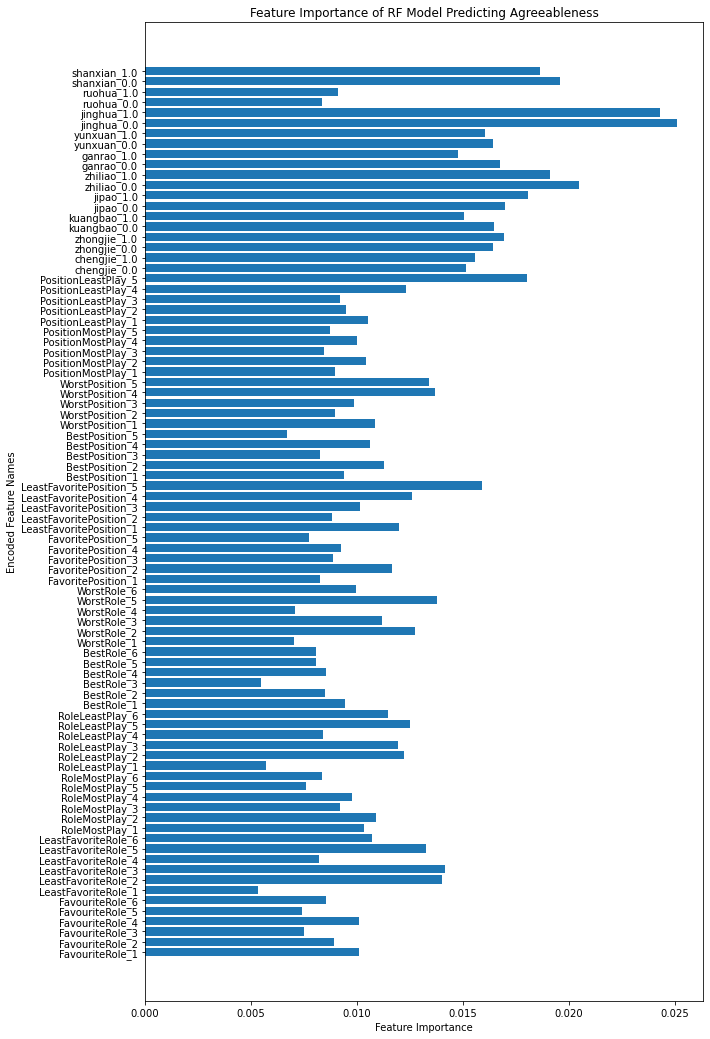

In [43]:
# Plot the feature importance of the encoded features in a bar plot
plt.figure(figsize=(10,18))
plt.barh(encoded_feature_names4, feature_importance4)
plt.xlabel('Feature Importance')
plt.ylabel('Encoded Feature Names')
plt.title('Feature Importance of RF Model Predicting Agreeableness');

#### 4) KNN 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [154]:
knn4 = make_pipeline(OneHotEncoder(),
                     KNeighborsClassifier())

knn_param_grid4={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
                'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_gs4 = GridSearchCV(knn4, knn_param_grid4, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
knn_gs4.fit(X_train4, y_train4)

print(f"best score: {knn_gs4.best_score_}")
print(f"best params: {knn_gs4.best_params_}")

Fitting 10 folds for each of 44 candidates, totalling 440 fits
best score: 0.5738811812967972
best params: {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 1}


#### 10-fold cv to make sure the model is not overfitting

In [155]:
best_knn4 = knn_gs.best_estimator_

cv_scores_knn4 = cross_val_score(best_knn4, X_train4, y_train4, cv=10, scoring='f1_macro')
print(cv_scores_knn4)
print(cv_scores_knn4.mean())
print(cv_scores_knn4.std())

[0.46753013 0.61067293 0.62136579 0.57460483 0.52217742 0.57460483
 0.55764163 0.50965517 0.44407407 0.59832705]
0.5480653854180343
0.05724065709725333


#### hold-out method to evaluate the classification performance

In [156]:
best_knn4.fit(X_train4,y_train4)
knn_pred4 = best_knn4.predict(X_test4)
print(classification_report(y_test4, knn_pred4))

              precision    recall  f1-score   support

        high       0.59      0.77      0.67       146
         low       0.55      0.34      0.42       119

    accuracy                           0.58       265
   macro avg       0.57      0.56      0.54       265
weighted avg       0.57      0.58      0.56       265



#### 5) SVM 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [157]:
svm4 = make_pipeline(OneHotEncoder(),
                     SVC(class_weight='balanced', random_state=42))

svm_param_grid4={'svc__kernel': ['linear', 'rbf', 'poly','sigmoid'],
                'svc__C': [0.01, 0.1, 1.0, 10, 100]}

svm_gs4 = GridSearchCV(svm4, svm_param_grid4, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
svm_gs4.fit(X_train4, y_train4)

print(f"best score: {svm_gs4.best_score_}")
print(f"best params: {svm_gs4.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
best score: 0.5851455692734888
best params: {'svc__C': 0.1, 'svc__kernel': 'rbf'}


#### 10-fold cv to make sure the model is not overfitting

In [158]:
best_svm4 = svm_gs.best_estimator_

cv_scores_svm4 = cross_val_score(best_svm4, X_train4, y_train4, cv=10, scoring='f1_macro')
print(cv_scores_svm4)
print(cv_scores_svm4.mean())
print(cv_scores_svm4.std())

[0.51242382 0.62476548 0.62406015 0.65822785 0.57985496 0.5436457
 0.59173127 0.61970475 0.49293967 0.54069767]
0.5788051304904618
0.05174652168842671


#### hold-out method to evaluate the classification performance

In [159]:
best_svm4.fit(X_train4,y_train4)
svm_pred4 = best_svm4.predict(X_test4)
print(classification_report(y_test4, svm_pred4))

              precision    recall  f1-score   support

        high       0.66      0.52      0.58       146
         low       0.53      0.66      0.59       119

    accuracy                           0.58       265
   macro avg       0.59      0.59      0.58       265
weighted avg       0.60      0.58      0.58       265



### 2.5 Conscientiousness

#### 2.5.1 Split data

In [160]:
X5 = data[['FavouriteRole', 'LeastFavoriteRole', 'RoleMostPlay', 'RoleLeastPlay', 'BestRole','WorstRole',
  'FavoritePosition', 'LeastFavoritePosition', 'BestPosition','WorstPosition','PositionMostPlay','PositionLeastPlay', 
 'chengjie', 'zhongjie', 'kuangbao', 'jipao', 'zhiliao', 'ganrao', 'yunxuan', 'jinghua', 'ruohua', 'shanxian']]
y5 = data['Conscientiousness']

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.25, stratify=y5, random_state=42, shuffle=True,)
X_train5.shape, X_test5.shape, y_train5.shape, y_test5.shape

((793, 22), (265, 22), (793,), (265,))

#### 2.5.2 Baseline model

In [161]:
dummy5 = DummyClassifier(strategy="most_frequent", random_state=42)
dummy5.fit(X_train5, y_train5)
accuracy5 = dummy5.score(X_train5, y_train5)
print(accuracy5)

y_pred5 = dummy5.predict(X_test5)
f1_5 = f1_score(y_test5, y_pred5, average='macro')
print(f1_5)

0.5044136191677175
0.33583959899749377


#### 2.5.3 Model performance comparison (evaluation metric: macro F1 score)

#### 1) LogisticRegression 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [162]:
lr5 = make_pipeline(OneHotEncoder(),
                    LogisticRegression(class_weight='balanced', random_state=42))

lr_param_grid5={'logisticregression__C': [0.01, 0.1, 1.0, 10, 100],
               'logisticregression__solver': ['newton-cg', 'sag', 'saga','lbfgs']}

lr_gs5 = GridSearchCV(lr5, lr_param_grid5, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
lr_gs5.fit(X_train5, y_train5)

print(f"best score: {lr_gs5.best_score_}")
print(f"best params: {lr_gs5.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
best score: 0.6869485752119069
best params: {'logisticregression__C': 0.1, 'logisticregression__solver': 'sag'}


#### 10-fold cv to make sure the model is not overfitting

In [163]:
best_lr5 = lr_gs.best_estimator_

cv_scores_lr5 = cross_val_score(best_lr5, X_train5, y_train5, cv=10, scoring='f1_macro')
print(cv_scores_lr5)
print(cv_scores_lr5.mean())
print(cv_scores_lr5.std())

[0.62476548 0.625      0.68705993 0.64551282 0.77211538 0.63196787
 0.73263497 0.6957638  0.74679487 0.6573494 ]
0.681896452398738
0.05105386074319661


##### hold-out method to evaluate the classification performance

In [164]:
best_lr5.fit(X_train5,y_train5)
lr_pred5 = best_lr5.predict(X_test5)
print(classification_report(y_test5, lr_pred5))

              precision    recall  f1-score   support

        high       0.71      0.66      0.68       134
         low       0.67      0.73      0.70       131

    accuracy                           0.69       265
   macro avg       0.69      0.69      0.69       265
weighted avg       0.69      0.69      0.69       265



#### 2) DecisionTree 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [165]:
dt5 = make_pipeline(OneHotEncoder(),
                    DecisionTreeClassifier(class_weight='balanced', random_state=42))

dt_param_grid5={'decisiontreeclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'decisiontreeclassifier__max_depth': [20, 30, 40, 50, 60, 70, 80, 90, 100]}

dt_gs5 = GridSearchCV(dt5, dt_param_grid5, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
dt_gs5.fit(X_train5, y_train5)

print(f"best score: {dt_gs5.best_score_}")
print(f"best params: {dt_gs5.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
best score: 0.6052335240441561
best params: {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 30}


#### 10-fold cv to make sure the model is not overfitting

In [166]:
best_dt5 = dt_gs.best_estimator_

cv_scores_dt5 = cross_val_score(best_dt5, X_train5, y_train5, cv=10, scoring='f1_macro')
print(cv_scores_dt5)
print(cv_scores_dt5.mean())
print(cv_scores_dt5.std())

[0.675      0.58736299 0.59899749 0.61872587 0.52892828 0.49293967
 0.58227848 0.73417722 0.58120482 0.59435173]
0.5993966552430161
0.06430284588669317


##### hold-out method to evaluate the classification performance

In [167]:
best_dt5.fit(X_train5,y_train5)
dt_pred5 = best_dt5.predict(X_test5)
print(classification_report(y_test5, dt_pred5))

              precision    recall  f1-score   support

        high       0.63      0.61      0.62       134
         low       0.61      0.63      0.62       131

    accuracy                           0.62       265
   macro avg       0.62      0.62      0.62       265
weighted avg       0.62      0.62      0.62       265



#### 3) RandomForest 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [168]:
rf5 = make_pipeline(OneHotEncoder(),
                    RandomForestClassifier(class_weight='balanced', random_state=42))

rf_param_grid5={'randomforestclassifier__n_estimators': [150, 300, 500],
               'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
               'randomforestclassifier__max_depth': [30, 40, 50]}

rf_gs5 = GridSearchCV(rf5, rf_param_grid5, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
rf_gs5.fit(X_train5, y_train5)

print(f"best score: {rf_gs5.best_score_}")
print(f"best params: {rf_gs5.best_params_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
best score: 0.6914629803370398
best params: {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 30, 'randomforestclassifier__n_estimators': 500}


#### 10-fold cv to make sure the model is not overfitting

In [169]:
best_rf5 = rf_gs.best_estimator_

cv_scores_rf5 = cross_val_score(best_rf5, X_train5, y_train5, cv=10, scoring='f1_macro')
print(cv_scores_rf5)
print(cv_scores_rf5.mean())
print(cv_scores_rf5.std())

[0.63698952 0.64646465 0.67479675 0.70811245 0.65800866 0.70411985
 0.57547631 0.73400673 0.72039897 0.75949367]
0.6817867551017041
0.05159323301616622


##### hold-out method to evaluate the classification performance

In [170]:
best_rf5.fit(X_train5,y_train5)
rf_pred5 = best_rf5.predict(X_test5)
print(classification_report(y_test5, rf_pred5))

              precision    recall  f1-score   support

        high       0.65      0.72      0.68       134
         low       0.68      0.61      0.64       131

    accuracy                           0.66       265
   macro avg       0.67      0.66      0.66       265
weighted avg       0.67      0.66      0.66       265



#### 4) KNN 
#### 10-fold gridsearch cv to fine tune the hyperparameters

In [171]:
knn5 = make_pipeline(OneHotEncoder(),
                     KNeighborsClassifier())

knn_param_grid5={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
                'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_gs5 = GridSearchCV(knn5, knn_param_grid5, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
knn_gs5.fit(X_train5, y_train5)

print(f"best score: {knn_gs5.best_score_}")
print(f"best params: {knn_gs5.best_params_}")

Fitting 10 folds for each of 44 candidates, totalling 440 fits
best score: 0.6648208173946177
best params: {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 10}


#### 10-fold cv to make sure the model is not overfitting

In [172]:
best_knn5 = knn_gs.best_estimator_

cv_scores_knn5 = cross_val_score(best_knn5, X_train5, y_train5, cv=10, scoring='f1_macro')
print(cv_scores_knn5)
print(cv_scores_knn5.mean())
print(cv_scores_knn5.std())

[0.53568627 0.58431743 0.6328533  0.66655844 0.68273092 0.70198458
 0.6760702  0.6802655  0.70799731 0.73142302]
0.6599886984465704
0.056846319716484336


##### hold-out method to evaluate the classification performance

In [173]:
best_knn5.fit(X_train5,y_train5)
knn_pred5 = best_knn5.predict(X_test5)
print(classification_report(y_test5, knn_pred5))

              precision    recall  f1-score   support

        high       0.62      0.78      0.70       134
         low       0.70      0.52      0.60       131

    accuracy                           0.65       265
   macro avg       0.66      0.65      0.65       265
weighted avg       0.66      0.65      0.65       265



#### 5) SVM 
#### 10-fold gridsearch cv to fune tune the hyperparameters

In [174]:
svm5 = make_pipeline(OneHotEncoder(),
                     SVC(class_weight='balanced', random_state=42))

svm_param_grid5={'svc__kernel': ['linear', 'rbf', 'poly','sigmoid'],
                'svc__C': [0.01, 0.1, 1.0, 10, 100]}

svm_gs5 = GridSearchCV(svm5, svm_param_grid5, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
svm_gs5.fit(X_train5, y_train5)

print(f"best score: {svm_gs5.best_score_}")
print(f"best params: {svm_gs5.best_params_}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
best score: 0.6862822053971036
best params: {'svc__C': 1.0, 'svc__kernel': 'rbf'}


#### 10-fold cv to make sure the model is not overfitting

In [175]:
best_svm5 = svm_gs.best_estimator_

cv_scores_svm5 = cross_val_score(best_svm5, X_train5, y_train5, cv=10, scoring='f1_macro')
print(cv_scores_svm5)
print(cv_scores_svm5.mean())
print(cv_scores_svm5.std())

[0.56243163 0.65989608 0.71245507 0.68334135 0.74646983 0.64090909
 0.66655844 0.68334135 0.74581725 0.68334135]
0.6784561441832833
0.05074288431322097


##### hold-out method to evaluate the classification performance

In [176]:
best_svm5.fit(X_train5,y_train5)
svm_pred5 = best_svm5.predict(X_test5)
print(classification_report(y_test5, svm_pred5))

              precision    recall  f1-score   support

        high       0.68      0.72      0.70       134
         low       0.69      0.65      0.67       131

    accuracy                           0.68       265
   macro avg       0.68      0.68      0.68       265
weighted avg       0.68      0.68      0.68       265

